# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

## Introduction
The company's challenge is a classification problem which requires machine learning. You could use various techniques such as K-Means and [ML] for example. The adopted methodology below will not incorporate machine learning but will utilise a similiar concept to mean square error. The error between the St Petersburg, which is considered as the baseline, and the other region's metrics will be evaluated to determine similarities in buying habits.


## Approach
explain that you will first perform the analysis without using machine learning<br>
(see how big the report is but may use ML to validate the ananlysis)
The St Petersburg region will be baselined, each region's alcohol types will be evaluated and the difference labelled as the error. Each analysis will be ranked from one onwards with one being the least error, i.e., closest to the baseline value. For each region, the ranks of each analysis will be accumulated providing a total score. The top 10 regions with the least totals will be considered to have similar buying habits to St Petersbury.

## Expectations
The above approach should work similarly to least square error method that is widely adopted for comparative analyses


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('russian_alcohol_consumption.csv')
df.head()

year              region  wine  beer  vodka  champagne  brandy
0  1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1  1998          Altai Krai   3.3  19.2   11.3        1.1     0.1
2  1998         Amur Oblast   2.1  21.2   17.3        0.7     0.4
3  1998  Arkhangelsk Oblast   4.3  10.6   11.7        0.4     0.3
4  1998    Astrakhan Oblast   2.9  18.0    9.5        0.8     0.2

## 1. Data Preparation

In [3]:
# Count number of rows with null values
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

Each type of alcohol contains null values, these will be removed reducing the dataset by approx. 4% (1,615 - 1,549) which will not significantly impact the analysis

In [4]:
# Drop rows with a null value
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1549 non-null   int64  
 1   region     1549 non-null   object 
 2   wine       1549 non-null   float64
 3   beer       1549 non-null   float64
 4   vodka      1549 non-null   float64
 5   champagne  1549 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.8+ KB


In [5]:
# Change year attribute to datetime data type
df2.year = pd.to_datetime(df2.year, format= '%Y')
df2.head(2)

C:\Users\chame\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


year              region  wine  beer  vodka  champagne  brandy
0 1998-01-01  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1 1998-01-01          Altai Krai   3.3  19.2   11.3        1.1     0.1

In [6]:
# Remove day and month from year attribute
from datetime import datetime as dt
df2['year'] = df2['year'].dt.strftime('%Y')

C:\Users\chame\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
# Set year to index
df3 = df2.set_index('year')
df3.head(2)

region  wine  beer  vodka  champagne  brandy
year                                                          
1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1
1998          Altai Krai   3.3  19.2   11.3        1.1     0.1

#### The first step in the analysis is complete following the completion of basic data preparation. In the next section, a high level understanding of the data will be achieved through EDA. 

## 2. Perform EDA

#### The wording of the problem states a recent promotion was completed but an exact time period has not been specified. Further, it is not immediately clear from a review of the data in which period the promotion was run. It may not be relevant however a graph will be plotted to determine the period in which the wine promotion was run in St Petersburg. <br> <br> It is important to define what is meant by "recent" in the background statement. Taking into account variability between human perceptions, "recent" in terms of years can be a figure stretching back five years from the current time.

In [8]:
df3_StPetersburg = df3[df3['region'] == 'Saint Petersburg']

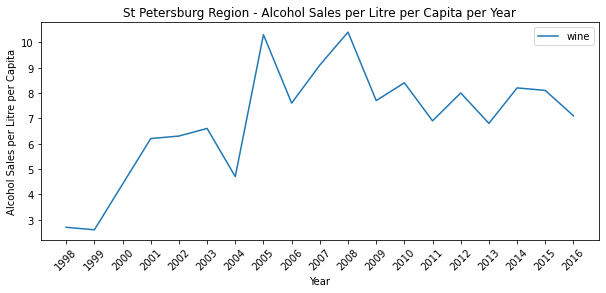

In [9]:
# Zoom into wine plot to identify the period of the sales promotion
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df3_StPetersburg.index, df3_StPetersburg['wine'], label='wine')
plt.xticks(rotation=45)
ax.set_xlabel('Year')
ax.set_ylabel('Alcohol Sales per Litre per Capita')
ax.set_title('St Petersburg Region - Alcohol Sales per Litre per Capita per Year')
ax.legend()
plt.show()

#### Wine sales were steadily declining between 2008 and end of 2012, a significant increase in sales was realised in 2013. The cause of the increase is not clear from the data, it could be as a result of local or international industry and/or political factors. For simplicity's sake, the increase is attributed to the wine promotion. From this understanding it can be proposed that the promotion was run in 2013 due to the spike in sales.

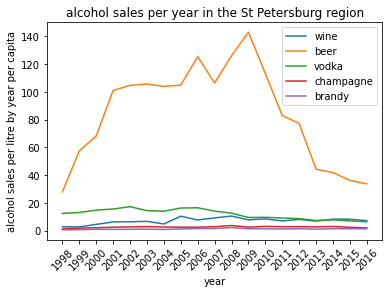

In [11]:
fig, ax = plt.subplots()
ax.plot(df3_StPetersburg.index, df3_StPetersburg['wine'], label='wine')
ax.plot(df3_StPetersburg.index, df3_StPetersburg['beer'], label='beer')
ax.plot(df3_StPetersburg.index, df3_StPetersburg['vodka'], label='vodka')
ax.plot(df3_StPetersburg.index, df3_StPetersburg['champagne'], label='champagne')
ax.plot(df3_StPetersburg.index, df3_StPetersburg['brandy'], label='brandy')
ax.set_xlabel('year')
ax.set_ylabel('alcohol sales per litre by year per capita')
ax.set_title('alcohol sales per year in the St Petersburg region')
plt.xticks(rotation=45)
ax.legend()
plt.show()

Findings overview for St Petersburg region:
1) Champagne and brandy have steadily increased since 1998 at a similar rate and quantity of sales are similar <br />
2) Sales of vodka have steadily reduced since about 2006 <br />
3) Wine sales have steadily increased since 1998 leveling off after 2012 <br />
4) Sales of wine and vodka have been similar since 2010 <br />
5) Sales of beer significantly rose and then dropped between 1998 and 2016 peaking in 2009 <br />

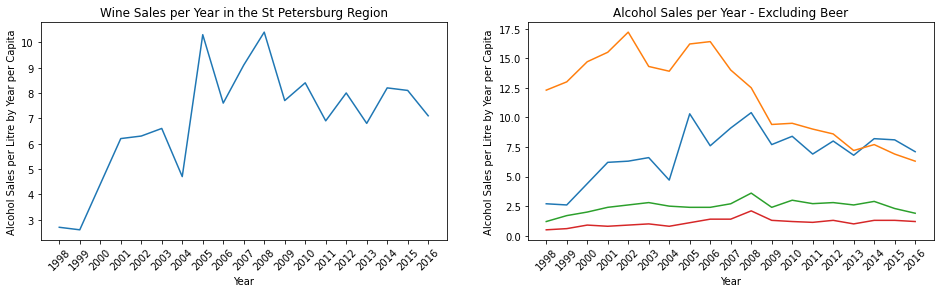

In [12]:
# Zoom into wine plot to identify the period of the sales promotion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df3_StPetersburg.index, df3_StPetersburg['wine'], label='wine')
ax1.set_xlabel('Year')
ax1.set_ylabel('Alcohol Sales per Litre by Year per Capita')
ax1.set_title('Wine Sales per Year in the St Petersburg Region')
ax1.tick_params(axis='x', labelrotation=45)

ax2.plot(df3_StPetersburg.index, df3_StPetersburg['wine'], label='wine')
ax2.plot(df3_StPetersburg.index, df3_StPetersburg['vodka'], label='vodka')
ax2.plot(df3_StPetersburg.index, df3_StPetersburg['champagne'], label='champagne')
ax2.plot(df3_StPetersburg.index, df3_StPetersburg['brandy'], label='brandy')
ax2.set_xlabel('Year')
ax2.set_ylabel('Alcohol Sales per Litre by Year per Capita')
ax2.set_title('Alcohol Sales per Year - Excluding Beer')
ax2.tick_params(axis='x', labelrotation=45)
ax.legend()
plt.show()

Findings:
1) There was a significant increase in sales between 1998 and 2005 <br />
2) Sales ranged between 10 and 8 per litre per capita between 2005 and 2009 <br />
3) Between 2010 and 2016 the sales ranged between 7 and 8.5 per litre per capita <br />

Assumption<br />
It is assumed we are in 2016 as the data ends at the end of 2015. This assumption is neccesary to determine when the promotion was rolled out as the information that was provided was that it was "recent". Using this assumption all significant sales increases prior to 2011 are considered as not recent. As a rule of thumb fives years from the current date could be considered as recent depending on who you speak to.  

Conclusion<br />
Pre-2008 (financial crash) the was a general increase in alcohol sales and wider consumer enthusiasm hence this period will not be defined as the timeframe where the successful wine promotion was rolled out. Since 2008 therefores been a general decline in sales but a notable spike in sales can be observed in 2013. Sales in 2014 marginaly reduced. <br />
<br />
The logical conclusion is the promotion was rolled out in 2013 given the buiness specified that the promotion was recent

## 3. Statistical Analysis

Introduction (what can be expected in this section, so what)


### First Analysis: Graphical Plot

In [13]:
#Create dataframes for each Russian region
regions_dfs = [x for _, x in df.groupby('region')]        #List of lists contains NaN values
regions_df2s = [x for _, x in df2.groupby('region')]      #List of lists does NOT contain NaN values

###### Develop function(s) for the analysis

In [14]:
# Add dotted lines highlighting St Petersburg & add to the function below (TO DO)

In [218]:
def plot_line_graph(data, data_2, y1, y2, y3, y4):
    '''
    Plots a line graph of all the regions within the input dataframe.
    
    Key Parameters:
        data - Input dataframe of the region(s) for comparsion to the baseline sales, in this case data_2
        data_2 - Input dataframe of the comparative region's alcohol sales
        y1 - First attribute to be plotted
        y2 - Second attribute to be plotted
        y3 - Third attribute to be plotted
        y4 - Fourth attribute to be plotted
    
    Returns:
        Graphical plots of all attributes (y1 to y4) for each region contained within the input dataframe    
    '''
    fig, ax = plt.subplots()
    ax.plot(data.year, data[y1], label=y1, color='green')
    ax.plot(data.year, data[y2], label=y2, color='blue')
    ax.plot(data.year, data[y3], label=y3, color='saddlebrown')
    ax.plot(data.year, data[y4], label=y4, color='deeppink')
    
    ax.plot(data_2.year, data_2[y1], label=y1, linestyle='dashed', color='lightgreen')
    ax.plot(data_2.year, data_2[y2], label=y2, linestyle='dashed', color='royalblue')
    ax.plot(data_2.year, data_2[y3], label=y3, linestyle='dashed', color='chocolate')
    ax.plot(data_2.year, data_2[y4], label=y4, linestyle='dashed', color='hotpink')
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Alcohol Sales per Litre by Year per Capita')
    plt.xticks(rotation=45)
    ax.set_title('Alcohol Sales per Year in ' + data.region.iloc[0] + ' against dotted ' + data_2.region.iloc[0])
    ax.legend()
plt.show()

###### Graphical analysis

C:\Users\chame\AppData\Local\Temp/ipykernel_8856/1994389023.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


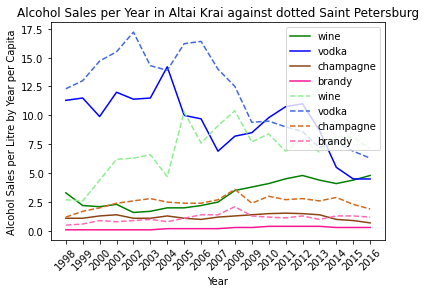

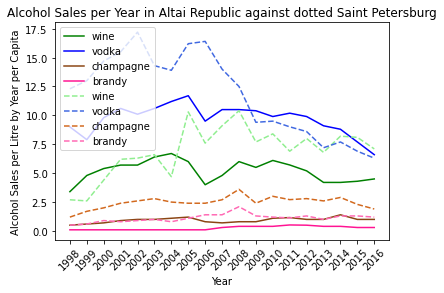

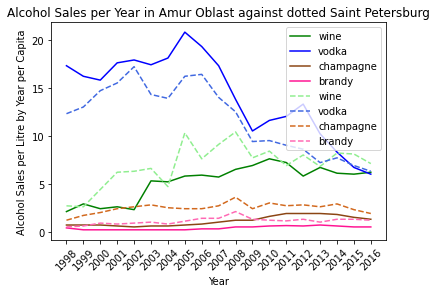

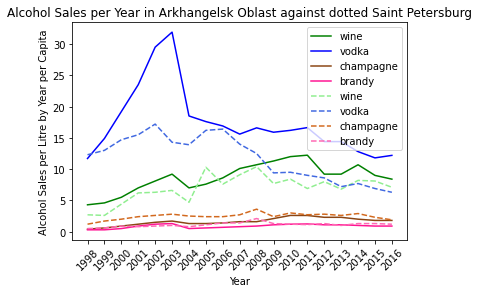

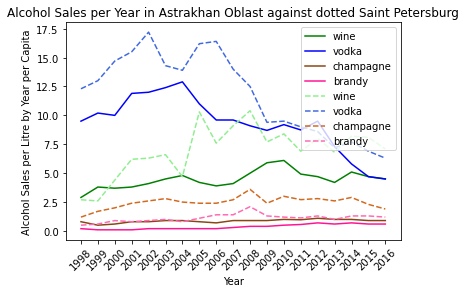

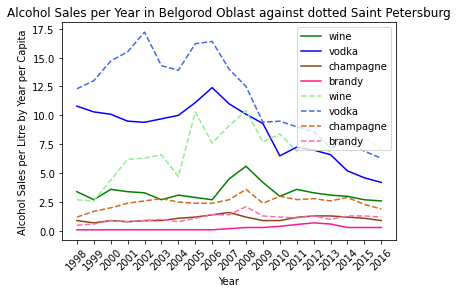

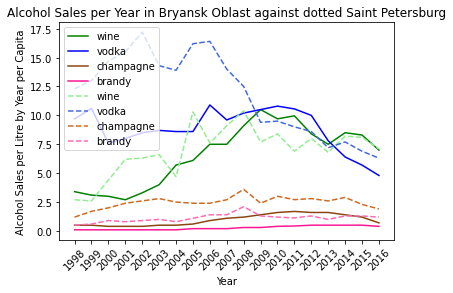

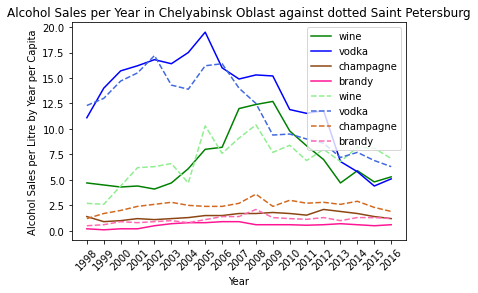

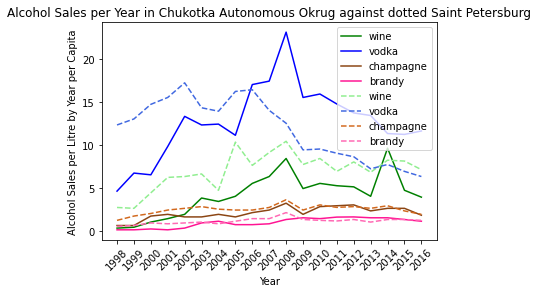

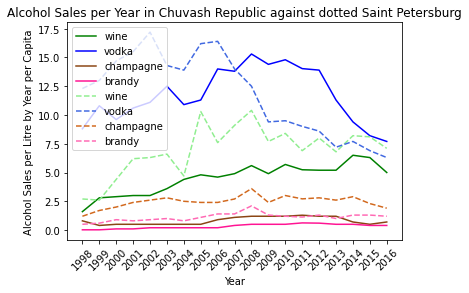

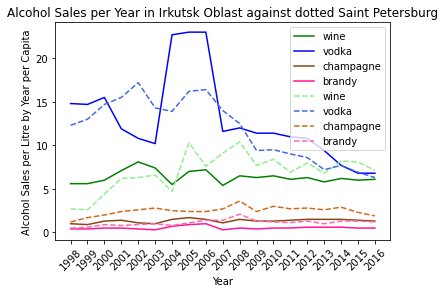

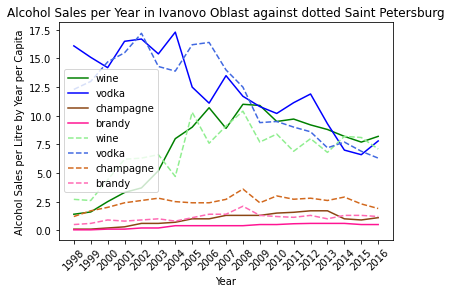

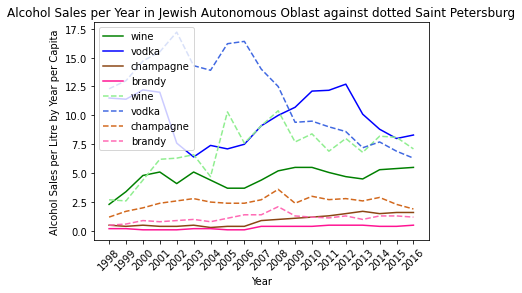

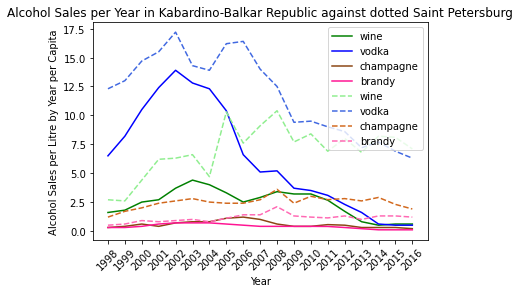

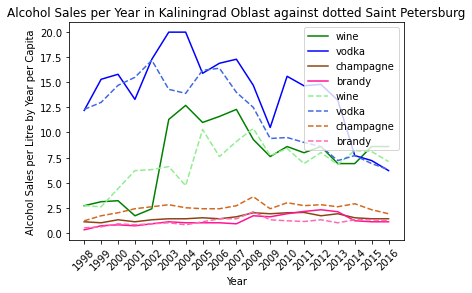

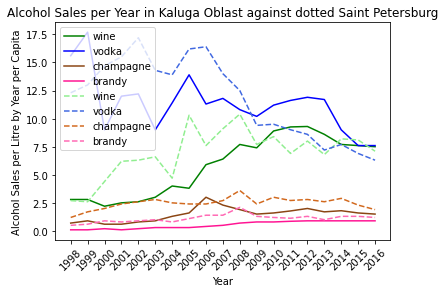

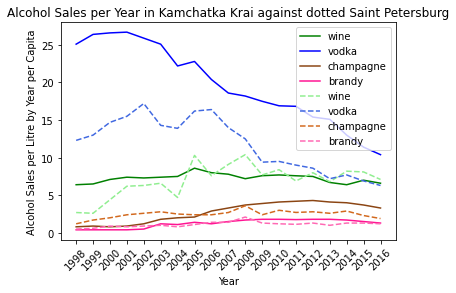

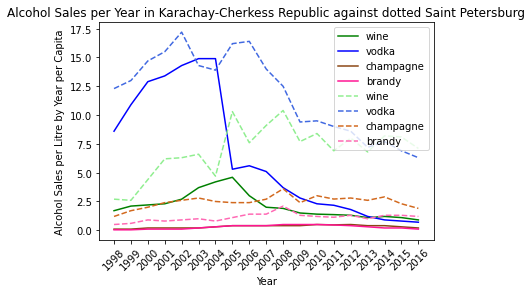

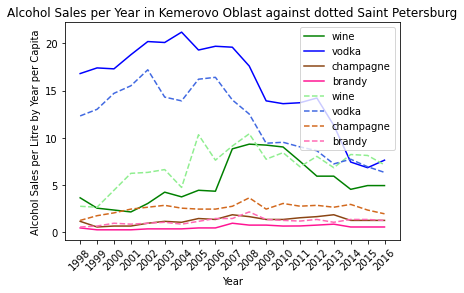

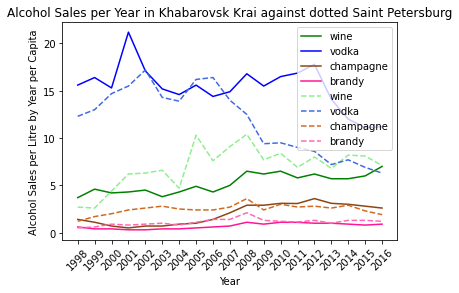

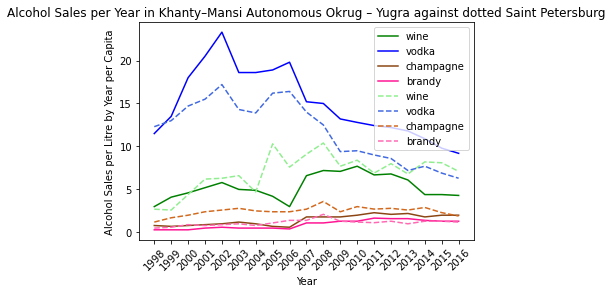

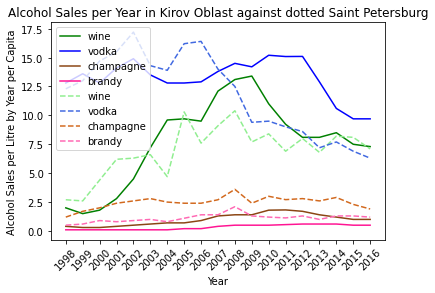

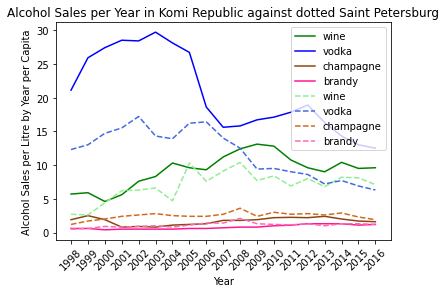

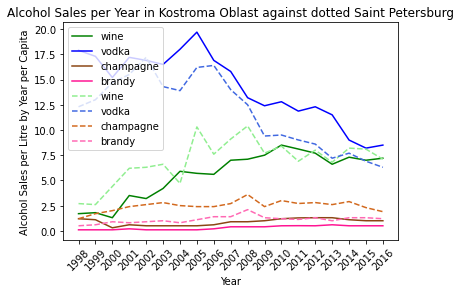

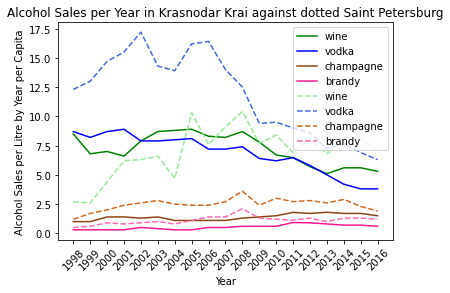

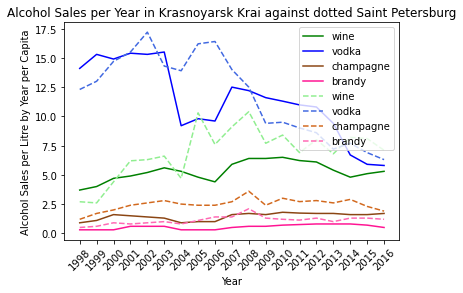

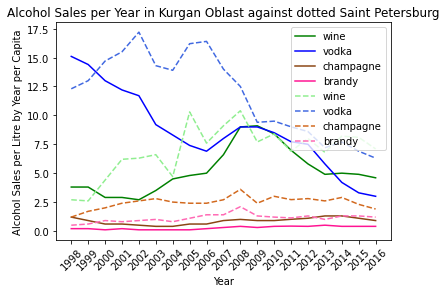

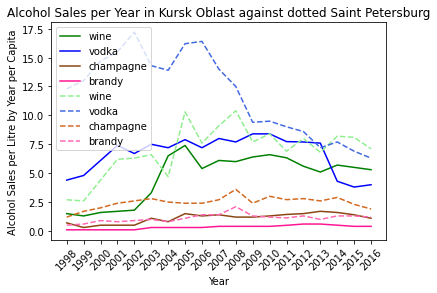

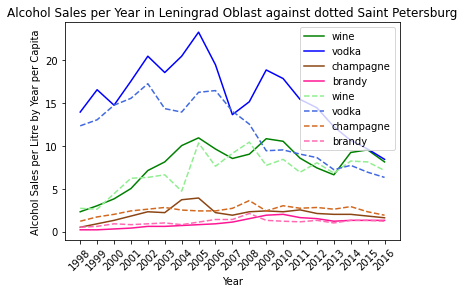

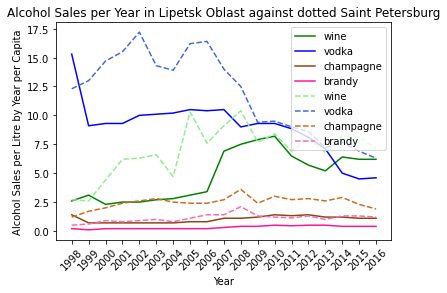

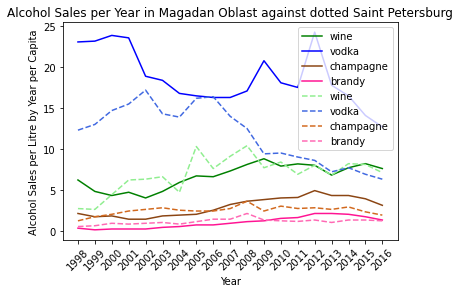

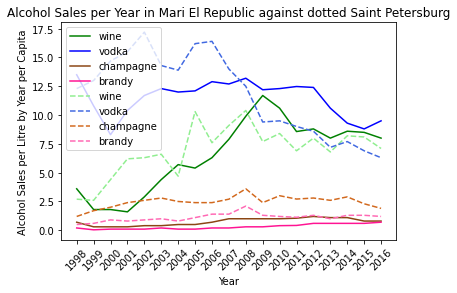

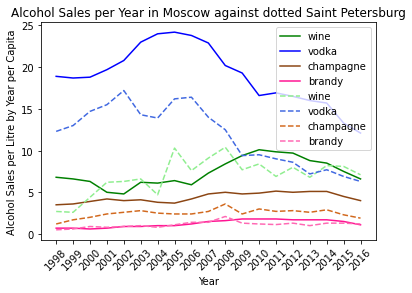

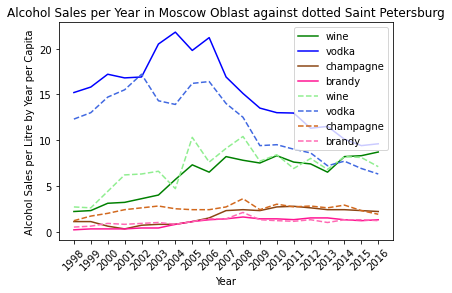

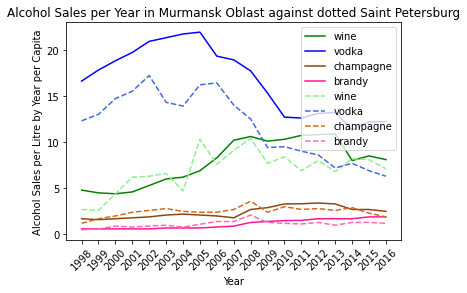

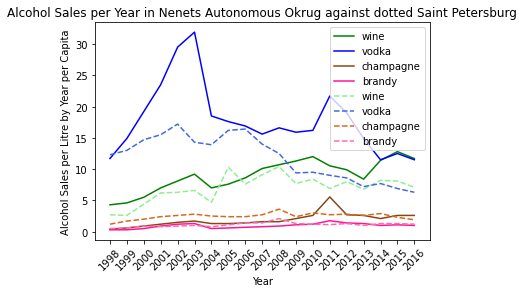

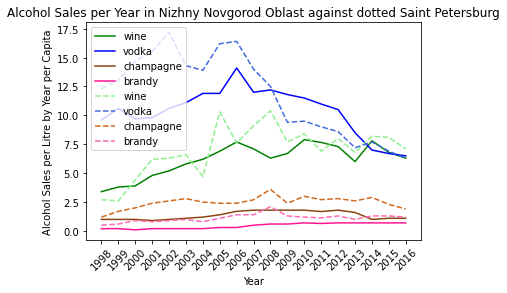

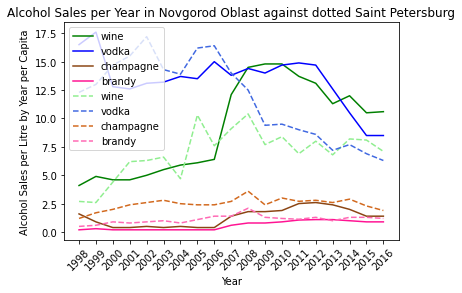

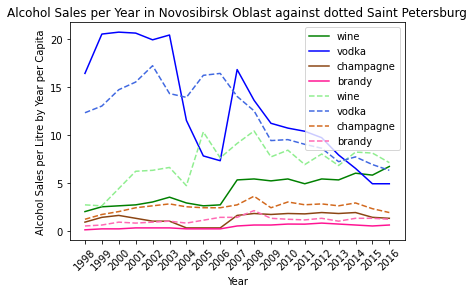

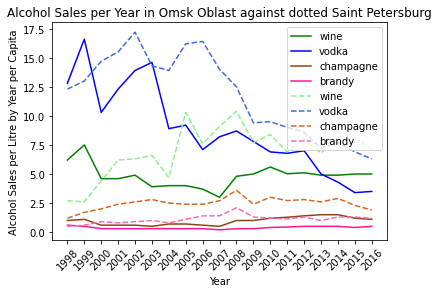

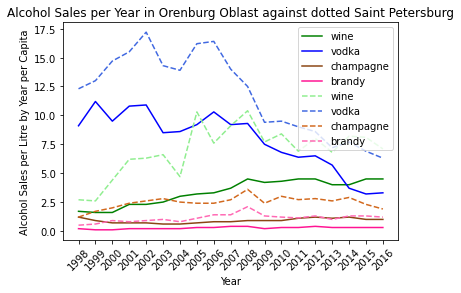

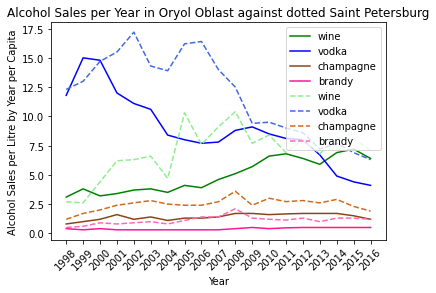

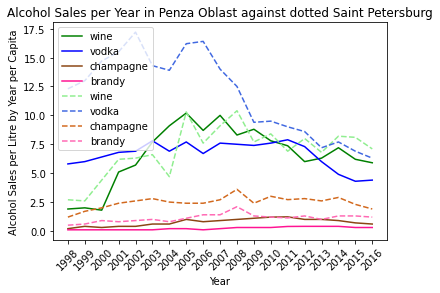

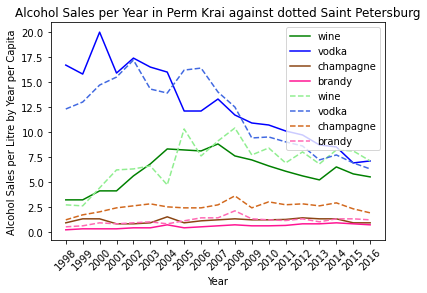

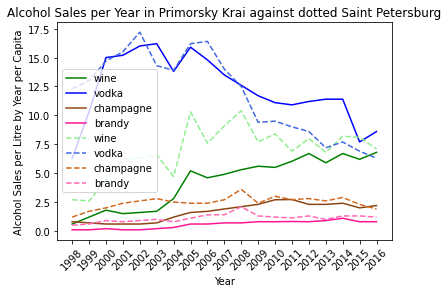

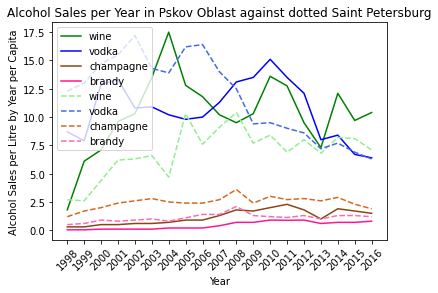

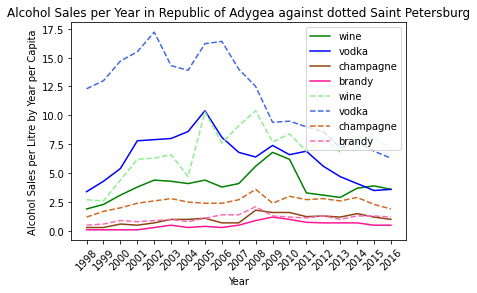

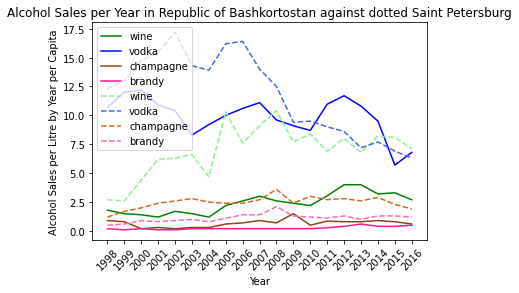

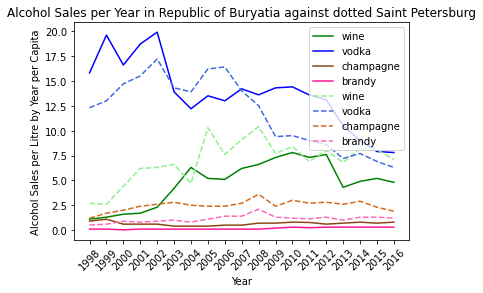

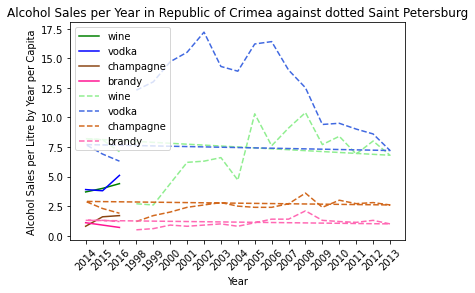

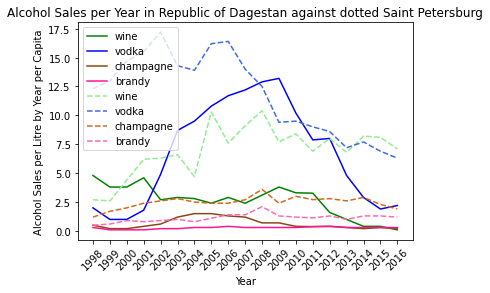

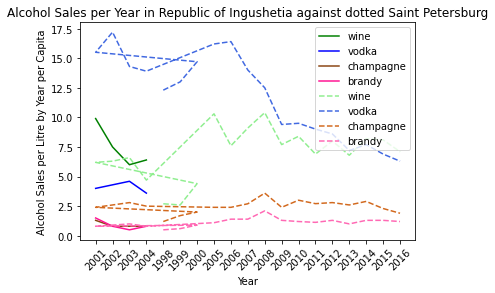

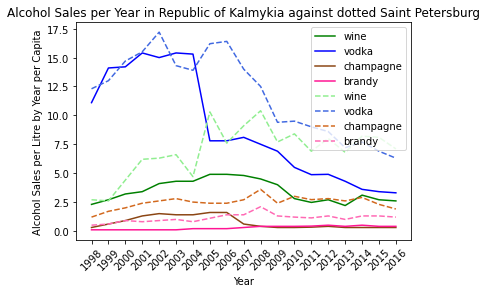

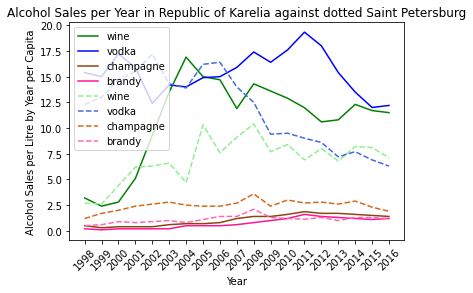

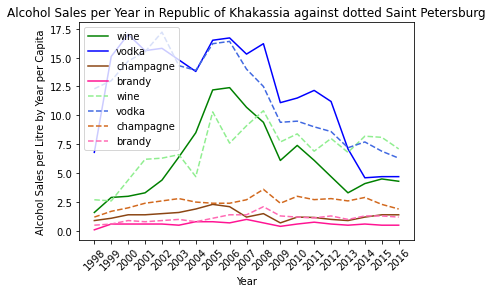

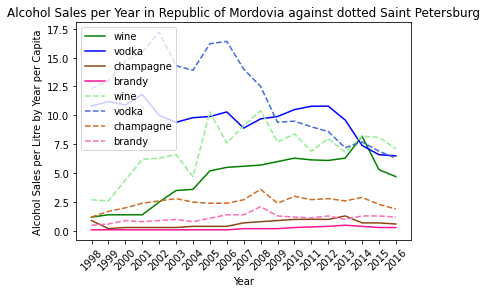

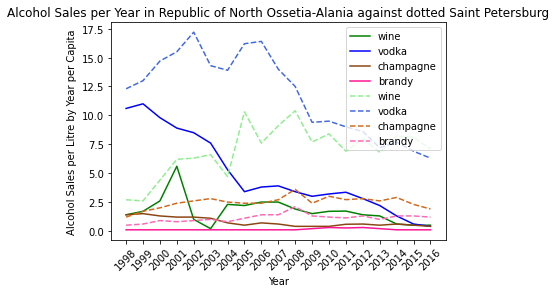

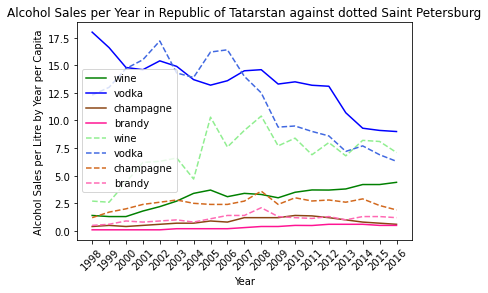

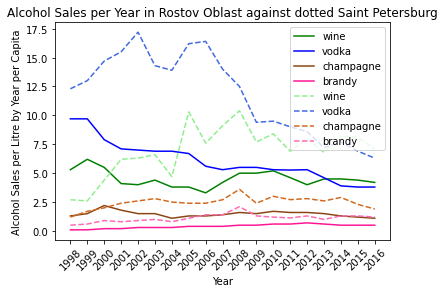

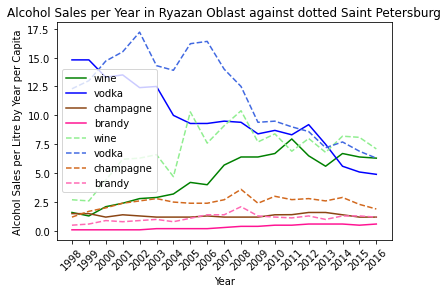

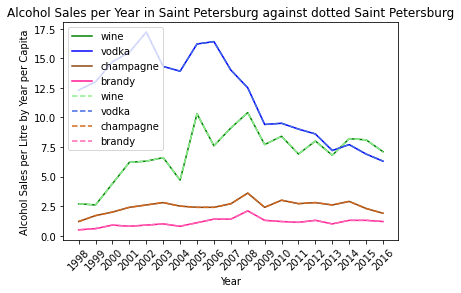

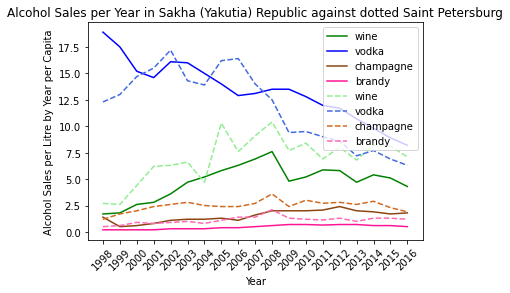

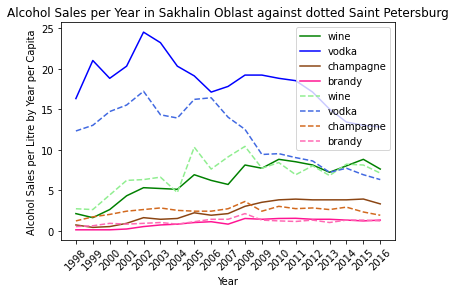

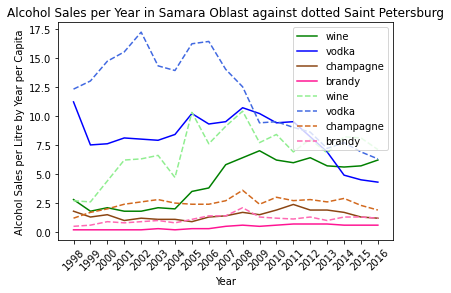

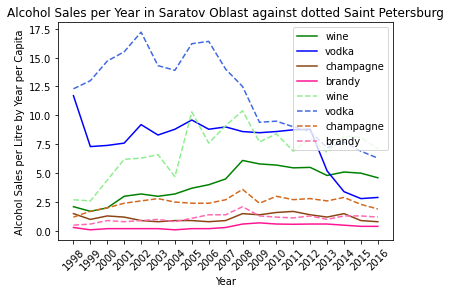

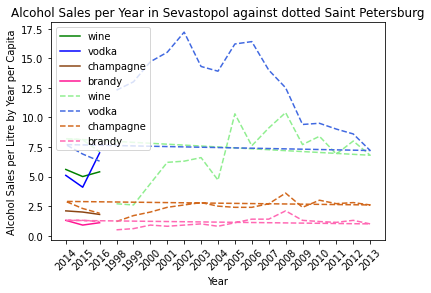

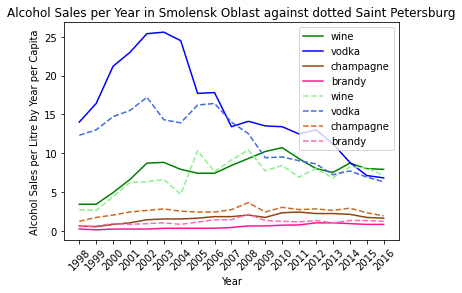

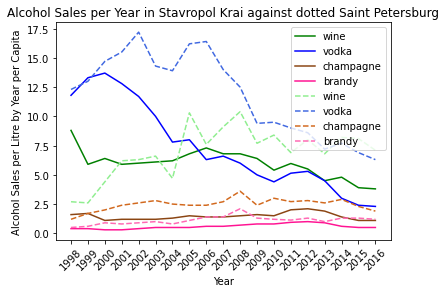

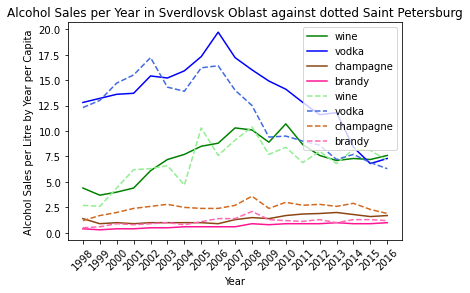

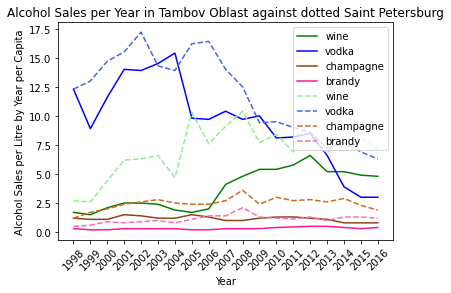

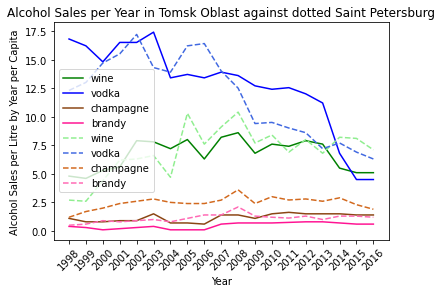

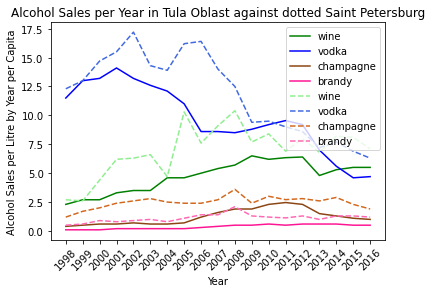

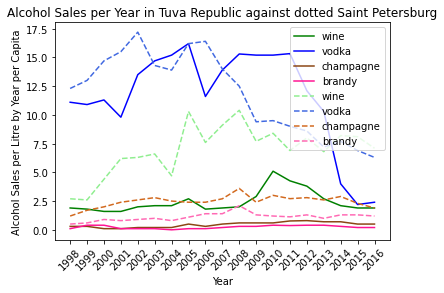

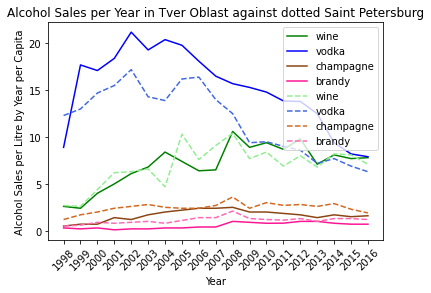

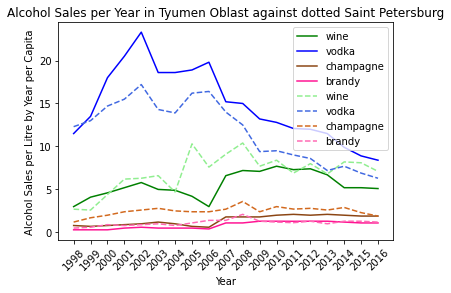

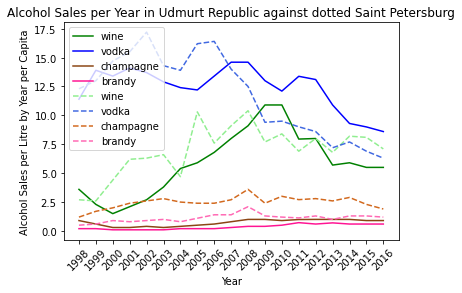

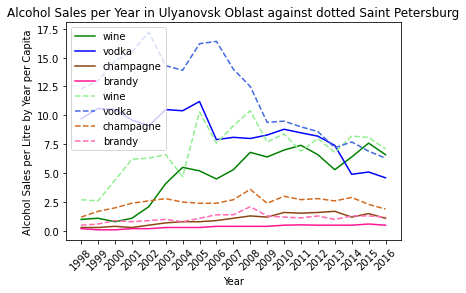

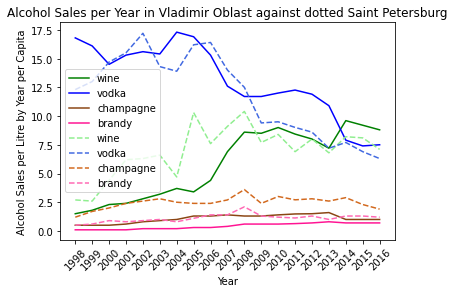

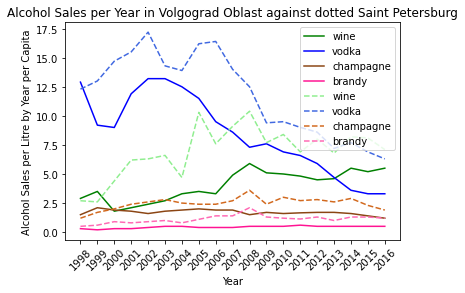

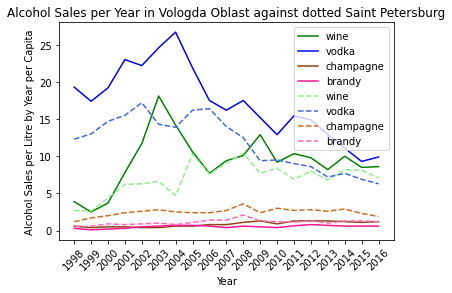

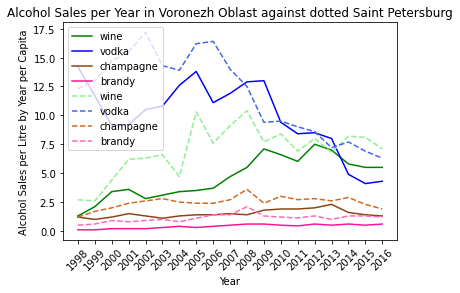

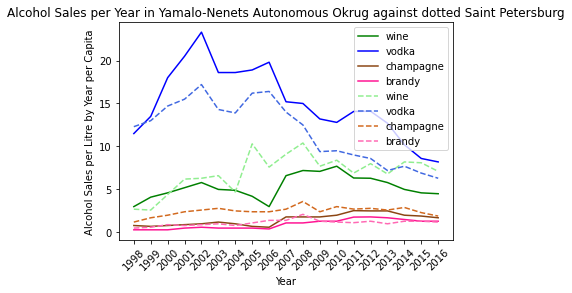

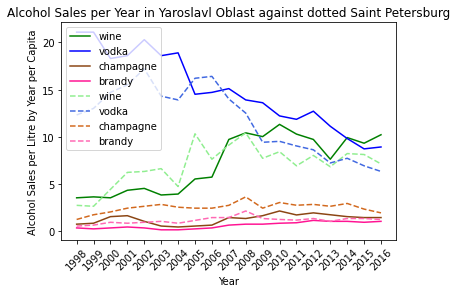

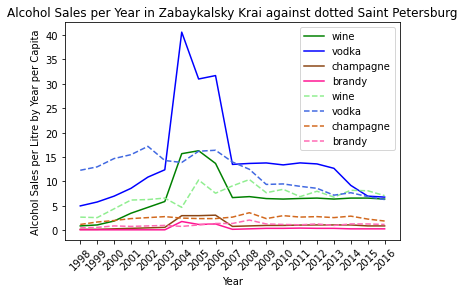

In [213]:
# Plot graphs of all regions
for region in range(0, df3.region.nunique()):
    plot_line_graph(regions_df2s[region], regions_df2s[60], y1='wine', y2='vodka', y3='champagne', y4= 'brandy')

### Second Analysis: Produce Ranking System

###### Produce ranking system for the change in wine sales in 2014 as a result of the campaign

###### Data Preparation

In [17]:
# Creating a table containing delta sales YoY for each region

# Sort dataframe by specific columns
df3_sorted = df3.sort_values(['region', 'year'])

# Create a table showing YoY rates of changes
df3_wine_to_brandy = df3_sorted.iloc[:, 1:6].diff()
df3_year_to_region = df3_sorted.iloc[: , 0:1]
df3_diff = pd.concat([df3_year_to_region, df3_wine_to_brandy], axis=1)

# Assign zero values to all rows where year is 1998 due to the unavailability of 1997 data
df3_diff.loc['1998', 'wine':'brandy'] = 0

# Produce a DataFrame
df_regions_against_change_in_2014 = pd.DataFrame(df3_diff.loc["2014", ['region','wine']])

###### Create function

In [221]:
def baseline_col_and_rank(df, col, region_col_name, year):
    '''Returns a DataFrame where the St Petersburg's alcohol type value is used as a baseline against
    the rest of the values within the same column. A difference between the baseline value and remainding
    column values is computed. St Petersburg is ranked first with the lowest difference placed second and so on.
    
    Parameters:
        df - Input dataframe
        col - Name of the alcohol type (attribute) under consideration for the calculation
        region_col_name - Name of the attribute listing the regions
        year - Alcohol sales analysis year
    
    Returns:
        Dataframe containing the ranked alcohol sales baselined against St Petersburg
    '''
    val = df.loc[df.region =='Saint Petersburg', col]
    df_baselined = df[col].apply(lambda x: x - val)
    df_baselined[region_col_name] = df[region_col_name]
    df_baselined = df_baselined[[region_col_name, year]]
    df_baselined = df_baselined.rename(columns={year:"Diff. in YoY sales change against baseline value of St Petersburg"})
    df_baselined['Diff. in YoY sales change against baseline value of St Petersburg_abs'] = df_baselined['Diff. in YoY sales change against baseline value of St Petersburg'].abs()
    df_baselined['rank_abs'] = df_baselined['Diff. in YoY sales change against baseline value of St Petersburg_abs'].rank(method= 'dense')
    
    return df_baselined

In [217]:
# Generate baselined dataframe for inclusion in the final ranking table 
df_regions_against_change_in_2014_baselined = baseline_col_and_rank(df=df_regions_against_change_in_2014, region_col_name= 'region', col='wine', year="2014")

###### Create functions enabling differences between two time periods to be computed and ranked

In [223]:
def _cal_diff_and_rank(df, start_year, end_year):
    '''
    Calculates the differences in alcohol sales between two specified years.
    
    
    Parameters:
        df - Input Dataframe
        start_year - Year of interest for alcohol sales analysis
        end_year - Year of interest for alcohol sales analysis
        
    Returns:
        Dataframe with new columns containing the calculated results. 
    '''
    pre_2008_df3_start_year_only = df.loc[start_year]
    pre_2008_df3_end_year_only = df.loc[end_year]
    pre_2008_df3_start_year_only_noindex = pre_2008_df3_start_year_only.reset_index()
    pre_2008_df3_end_year_only_noindex = pre_2008_df3_end_year_only.reset_index()
    
    _start_end_merged_df = pd.merge(pre_2008_df3_start_year_only_noindex,
         pre_2008_df3_end_year_only_noindex,
         left_index=True,
         right_index=True,
         suffixes=("_start", "_end"))
    
    _start_end_merged_df['wine_diff'] = _start_end_merged_df['wine_end']-_start_end_merged_df['wine_start']
    _start_end_merged_df['beer_diff'] = _start_end_merged_df['beer_end']-_start_end_merged_df['beer_start']
    _start_end_merged_df['vodka_diff'] = _start_end_merged_df['vodka_end']-_start_end_merged_df['vodka_start']
    _start_end_merged_df['champagne_diff'] = _start_end_merged_df['champagne_end']-_start_end_merged_df['champagne_start']
    _start_end_merged_df['brandy_diff'] = _start_end_merged_df['brandy_end']-_start_end_merged_df['brandy_start']
    
    cols = ['wine_diff', 'beer_diff', 'vodka_diff', 'champagne_diff', 'brandy_diff']
    ls_ = {}

    for col in cols:
        value_diffs_ = _start_end_merged_df.loc[_start_end_merged_df.region_start=='Saint Petersburg', col]
        ls_['_start_end_merged_df_{0}'.format(col)] = _start_end_merged_df[col].apply(lambda x: x - value_diffs_)
    
    return _start_end_merged_df

In [232]:
def tuple_list(_start_end_merged_df):
    '''
    Converts the Input DataFrame, which is the output of the _cal_diff_and_rank function, and converts
    it into a dictionary.
    '''
    cols = ['wine_diff', 'beer_diff', 'vodka_diff', 'champagne_diff', 'brandy_diff']
    ls_ = {}

    for col in cols:
        value_diffs_ = _start_end_merged_df.loc[_start_end_merged_df.region_start=='Saint Petersburg', col]
        ls_['_start_end_merged_df_{0}'.format(col)] = _start_end_merged_df[col].apply(lambda x: x - value_diffs_)
    
    return ls_

In [233]:
def ls_to_dataframe(list_, _start_end_merged_df_):
    '''
    Converts the inputs parameters, the first being an output from the tuple_list function, and 
    combines them into a DataFrame.
    
    Parameters:
        list_ - list of the alcohol type data which does not have a region's attribute
        _start_end_merged_df_ - used to get the region names which are combined with the alcohol type values of 'list_'
    
    Returns:
        Dataframe with calculated ranking results and a region's column.
    '''
    df_temp1_ =list_['_start_end_merged_df_wine_diff']
    df_temp2_ =list_['_start_end_merged_df_beer_diff']
    df_temp3_ =list_['_start_end_merged_df_vodka_diff']
    df_temp4_ =list_['_start_end_merged_df_champagne_diff']
    df_temp5_ =list_['_start_end_merged_df_brandy_diff']
    
    df_temp1_ = df_temp1_.rename(columns={57:"wine_diff"})
    df_temp2_ = df_temp2_.rename(columns={57:"beer_diff"})
    df_temp3_ = df_temp3_.rename(columns={57:"vodka_diff"})
    df_temp4_ = df_temp4_.rename(columns={57:"champagne_diff"})
    df_temp5_ = df_temp5_.rename(columns={57:"brandy_diff"})
    
    _start_end_merged_diff_df = pd.concat([_start_end_merged_df_['region_start'], df_temp1_,
               df_temp2_,
              df_temp3_,
              df_temp4_,
              df_temp5_],
              axis=1)
    
    return _start_end_merged_diff_df

In [23]:
def rank_col(df, col_diff):
    '''
    '''
    df['{0}_abs'.format(col_diff)] = df[col_diff].abs()
    df['{0}_abs_rank'.format(col_diff)] = df['{0}_abs'.format(col_diff)].rank(method= 'dense')
    return df

###### To determine similarity between regions the above functions will be used to select various time periods for the computation of<br> differences in alcohol sales against the baseline value of the St Peterburg region. These analyses will be completed below.

##### 1) Create pre-2009 table where wine is ranked

In [24]:
# Slicing the dataset to include all alcohol between 1998 and 2008
# and calculating the differences in sales between the years
pre_2008_merged_df = _cal_diff_and_rank(df3, "1998", "2008")
diffs_ls_ = tuple_list(pre_2008_merged_df)
_1998_2008_merged_df = ls_to_dataframe(list_=diffs_ls_, _start_end_merged_df_= pre_2008_merged_df)

# Ranking the differences in wine sales attribute
_1998_2008_merged_df_wine_col_ranked = rank_col(_1998_2008_merged_df, 'wine_diff')

###### 2) Create post-2008 table where wine is ranked

In [25]:
# Slicing the dataset to include all alcohol from 2009 onwards
# and calculating the differences in sales between the years
post_2008_merged_df = _cal_diff_and_rank(df3, "2009", "2016")
diffs_ls_post2008 = tuple_list(post_2008_merged_df)
_2009_2016_merged_df = ls_to_dataframe(list_=diffs_ls_post2008, _start_end_merged_df_= post_2008_merged_df)

# Ranking the differences in wine sales attribute
_2009_2016_merged_df_wine_col_ranked = rank_col(_2009_2016_merged_df, 'wine_diff')

###### 3) Ranking beer using pre-2009 table

In [26]:
# Ranking the differences in beer sales attribute
_1998_2008_merged_df_beer_col_ranked = rank_col(_1998_2008_merged_df, 'beer_diff')

###### 4) Ranking beer using post-2008 table

In [27]:
# Ranking the differences in beer sales attribute
_2009_2016_merged_df_beer_col_ranked = rank_col(_2009_2016_merged_df, 'beer_diff')

###### 5) Ranking vodka, champagne & brandy using pre-2009 table

In [28]:
# Ranking the differences in vodka, champagne & brandy sales attributes
_1998_2008_merged_df_vodka_col_ranked = rank_col(_1998_2008_merged_df, 'vodka_diff')
_1998_2008_merged_df_champagne_col_ranked = rank_col(_1998_2008_merged_df, 'champagne_diff')
_1998_2008_merged_df_brandy_col_ranked = rank_col(_1998_2008_merged_df, 'brandy_diff')

###### 6) Ranking vodka, champagne & brandy using post-2008 table

In [29]:
# Ranking the differences in vodka, champagne & brandy sales attributes
_2009_2016_merged_df_vodka_col_ranked = rank_col(_2009_2016_merged_df, 'vodka_diff')
_2009_2016_merged_df_champagne_col_ranked = rank_col(_2009_2016_merged_df, 'champagne_diff')
_2009_2016_merged_df_brandy_col_ranked = rank_col(_2009_2016_merged_df, 'brandy_diff')

###### Compile the final table and determine the top 10 regions

In [30]:
# Sort datasets by region
_1998_2008_merged_df_brandy_col_ranked_sorted = _1998_2008_merged_df_brandy_col_ranked.sort_values(by="region_start")
_2009_2016_merged_df_brandy_col_ranked_sorted = _2009_2016_merged_df_brandy_col_ranked.sort_values(by="region_start")

In [31]:
# Subset the sorted datasets keeping the ranked columns only
_1998_2008_merged_df_brandy_col_ranked_sorted_sub = _1998_2008_merged_df_brandy_col_ranked_sorted[['region_start', 'wine_diff_abs_rank',
                                                  'beer_diff_abs_rank',
                                                  'vodka_diff_abs_rank',
                                                 'champagne_diff_abs_rank', 'brandy_diff_abs_rank']]

_2009_2016_merged_df_brandy_col_ranked_sorted_sub = _2009_2016_merged_df_brandy_col_ranked_sorted[['region_start', 'wine_diff_abs_rank',
                                                  'beer_diff_abs_rank',
                                                  'vodka_diff_abs_rank',
                                                 'champagne_diff_abs_rank', 'brandy_diff_abs_rank']]

In [32]:
print("Number of rows within the pre-2009 table is {}".format(_1998_2008_merged_df_brandy_col_ranked_sorted_sub.shape[0]))
print("Number of rows within the post-2008 table is {}".format(_2009_2016_merged_df_brandy_col_ranked_sorted_sub.shape[0]))

Number of rows within the pre-2009 table is 81
Number of rows within the post-2008 table is 81


In [33]:
# Check the shape of the baselined dataframe created earlier as these three tables will be concatenated
print("Number of rows within the baselined table is {}".format(df_regions_against_change_in_2014_baselined.shape[0]))

Number of rows within the baselined table is 83


###### The task is to find out where the discrepency lies and how it should be managed

In [34]:
# Check why there are 83 rows in df_regions_against_change_in_2014_baselined and correct
check_df = df_regions_against_change_in_2014_baselined['region'].isin(_2009_2016_merged_df_brandy_col_ranked_sorted_sub['region_start'].unique())
df_regions_against_change_in_2014_baselined[~check_df]

year              region  \
year                       
2014  Republic of Crimea   
2014          Sevastopol   

year  Diff. in YoY sales change against baseline value of St Petersburg  \
year                                                                      
2014                                               -2.5                   
2014                                               -0.4                   

year  Diff. in YoY sales change against baseline value of St Petersburg_abs  \
year                                                                          
2014                                                2.5                       
2014                                                0.4                       

year  rank_abs  
year            
2014      43.0  
2014       9.0

In [35]:
# Justify the removal of the above rows (graphical and numerically)

In [42]:
# Identify which years Republic of Crimea was within the records
df3[df3["region"] == "Republic of Crimea"].head(20)

region  wine  beer  vodka  champagne  brandy
year                                                          
2014  Republic of Crimea   3.7  16.2    3.9        0.8     1.1
2015  Republic of Crimea   4.0  42.8    3.8        1.6     0.9
2016  Republic of Crimea   4.4  42.1    5.1        1.7     0.7

In [43]:
# Identify which years Republic of Crimea was within the records
df3[df3["region"] == "Sevastopol"].head(20)

region  wine  beer  vodka  champagne  brandy
year                                                  
2014  Sevastopol   5.6  26.0    5.1        2.1     1.3
2015  Sevastopol   5.0  15.2    4.1        2.0     0.9
2016  Sevastopol   5.4  22.9    7.0        1.8     1.1

Findings:<br/> Republic of Crimea and Sevastopol will be removed from the analysis due to limited data in comparison to the rest of the dataset.

In [51]:
# Remove two rows from the dataset (df_regions_against_change_in_2014_baselined)
df_regions_against_change_in_2014_baselined_81 = df_regions_against_change_in_2014_baselined[check_df]

df_regions_against_change_in_2014_baselined_81 = df_regions_against_change_in_2014_baselined_81.reset_index()

In [114]:
df_regions_against_change_in_2014_baselined_81.sort_values(by='region', inplace=True)

In [126]:
df_regions_against_change_in_2014_baselined_81 = df_regions_against_change_in_2014_baselined_81[['region', 'rank_abs']]

###### The discrepency has been identified and a solution implemented. All tables will be combined and the data ranked.

In [141]:
# Join the pre-2009 and post-2008 datasets
ranked_df_sub = pd.concat([_1998_2008_merged_df_brandy_col_ranked_sorted_sub.add_suffix('_pre_2009'),
         _2009_2016_merged_df_brandy_col_ranked_sorted_sub.add_suffix('_post_2009')],
                          ignore_index=False,
         axis=1)

ranked_df_sub = ranked_df_sub.reset_index()

In [142]:
ranked_df_sub = ranked_df_sub[['region_start_pre_2009', 'wine_diff_abs_rank_pre_2009',
       'beer_diff_abs_rank_pre_2009', 'vodka_diff_abs_rank_pre_2009',
       'champagne_diff_abs_rank_pre_2009', 'brandy_diff_abs_rank_pre_2009',
       'wine_diff_abs_rank_post_2009',
       'beer_diff_abs_rank_post_2009', 'vodka_diff_abs_rank_post_2009',
       'champagne_diff_abs_rank_post_2009', 'brandy_diff_abs_rank_post_2009']]

ranked_df_sub.sort_values(by='region_start_pre_2009', inplace=True)

ranked_df_sub = ranked_df_sub.reset_index()

In [137]:
# Combine the above dataset and 2014 baselined dataset
ranked_df_subset_all_cols = pd.concat([ranked_df_sub,
         df_regions_against_change_in_2014_baselined_81],
         axis=1)

In [151]:
ranked_df_sub_final_table = ranked_df_subset_all_cols[['region_start_pre_2009', 'wine_diff_abs_rank_pre_2009',
       'beer_diff_abs_rank_pre_2009', 'vodka_diff_abs_rank_pre_2009',
       'champagne_diff_abs_rank_pre_2009', 'brandy_diff_abs_rank_pre_2009',
       'wine_diff_abs_rank_post_2009', 'beer_diff_abs_rank_post_2009',
       'vodka_diff_abs_rank_post_2009', 'champagne_diff_abs_rank_post_2009',
       'brandy_diff_abs_rank_post_2009', 'rank_abs']]

In [240]:
# Sum all ranks into a new column
ranked_df_sub_final_table["Total"] = ranked_df_sub_final_table.iloc[: ,  1:].sum(axis=1)

# Rank the totals
ranked_df_sub_final_table['Total_Ranked'] = ranked_df_sub_final_table['Total'].rank()

# Sort the ranks in ascending order and display top 10 regions
ranked_df_sub_final_table_ranked = ranked_df_sub_final_table.sort_values(by="Total_Ranked")
ranked_df_sub_final_table_ranked__top10 = ranked_df_sub_final_table_ranked.iloc[:10,:]

###### Graphical plot of the top 10 where St Petersburg is the dotted lines

In [252]:
ranked_df_sub_final_table_ranked__top10.region_start_pre_2009

58      Saint Petersburg
33         Moscow Oblast
19       Khabarovsk Krai
43             Perm Krai
76        Vologda Oblast
4       Astrakhan Oblast
71         Tyumen Oblast
14    Kaliningrad Oblast
44        Primorsky Krai
11        Ivanovo Oblast
Name: region_start_pre_2009, dtype: object

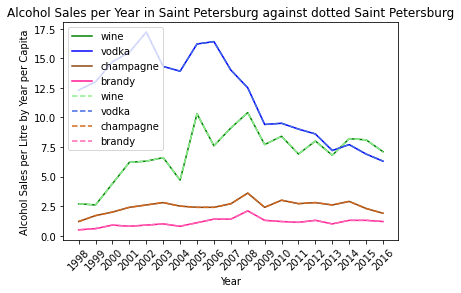

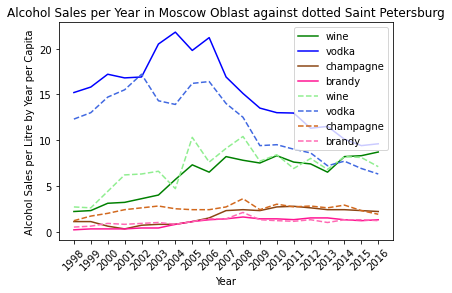

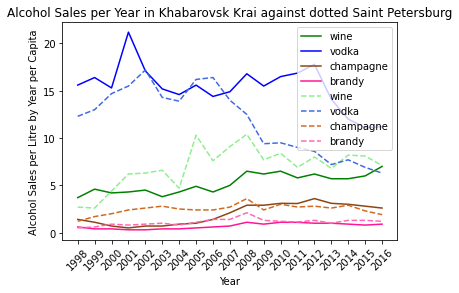

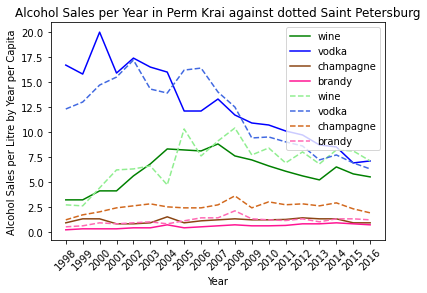

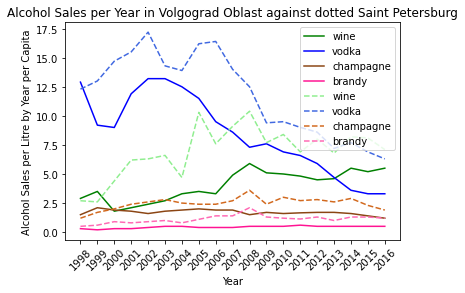

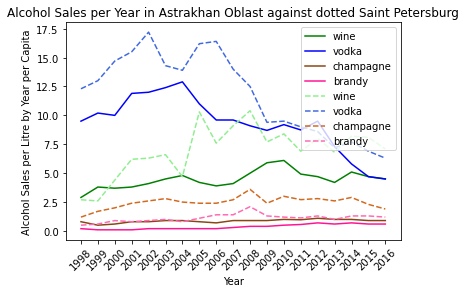

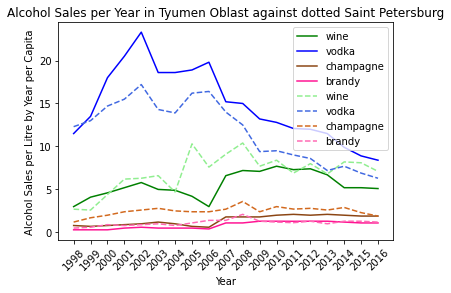

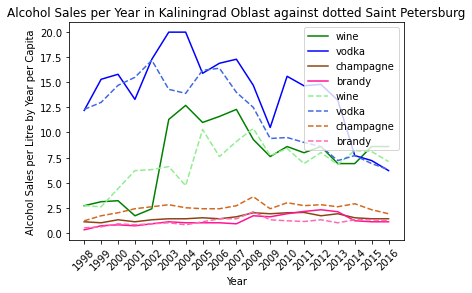

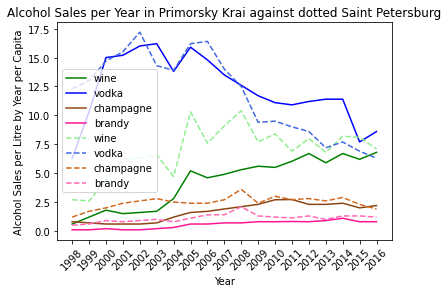

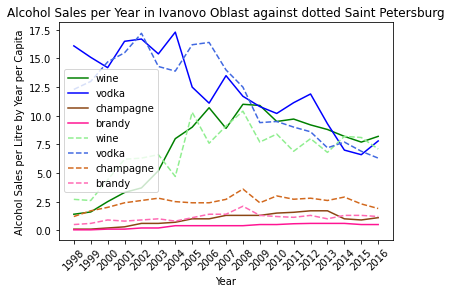

In [262]:
# Plot graphs of all regions
for region in [58+2, 33, 19, 43, 76+2, 4, 71+3, 14, 44, 11]:
    plot_line_graph(regions_df2s[region], regions_df2s[60], y1='wine', y2='vodka', y3='champagne', y4= 'brandy')

## 4. Conclusion

In [11]:
# Summaries

In [12]:
# Recommendations

Improvements to this analysis include:
- Ensuring positive and negative differences in sales changes are accounted for, e.g. if St Petersburg sales changes are positive then regions with negative sales change values are ranked after all positive sales changes, and vise versa
- (introducing fixed bands where the nearest to ST.P are 5, then 10 then 15 - the purpose would be to penalise changes that are further away. This could result in the closest value being denoted with 3 and the one after 10 and other even larger... This would be an alternative to squaring the errors.
- Weighting some of the analysis could help with determine similarity, e.g., more emphasis could be placed on wine and beer sales having experienced the largest changes in sales over the period of the dataset
- Review whether Republic of Crimea and Sevastopol are similar to St Petersburg. Complete an assessment focussing on the years where data is available for the two noted regions.